In [38]:
import preprocess_swarm
from preprocess_swarm import SelectGridSquares
from preprocess_swarm import ConvertoDatetime

In [39]:
locust_new = ConvertoDatetime('Swarms.csv')
locust_df = locust_new.convert()
locust_df.head()

,X,Y,OBJECTID,STARTDATE,TmSTARTDAT,FINISHDATE,TmFINISHDA,EXACTDATE,PARTMONTH,LOCNAME,...,CTLQTYU,CTLARTREA,CTLARTREAU,CTLAPPHAND,CTLAPPVEHI,CTLAPPAIR,CTLAPPMECH,CTLAPPUNK,CTLESTKILL,CAT
0,-15.131944,17.870278,1,1985-11-30,12:00:00,1985-11-30,12:00:00,No,Late,,...,,0.0,,0,0,0,0,0,0,Swarm
1,-15.400278,18.030833,2,1985-11-26,12:00:00,1985-11-26,12:00:00,No,Late,,...,,0.0,,0,0,0,0,0,0,Swarm
2,-14.668889,17.988889,3,1985-11-27,12:00:00,1985-11-27,12:00:00,No,Late,,...,,0.0,,0,0,0,0,0,0,Swarm
3,-14.633333,17.835833,4,1985-11-30,12:00:00,1985-11-30,12:00:00,No,Late,,...,,0.0,,0,0,0,0,0,0,Swarm
4,-13.353889,18.026389,5,1985-10-15,12:00:00,1985-10-15,12:00:00,Yes,,,...,,0.0,,0,0,0,0,0,0,Swarm


In [40]:
ethiopia_df = SelectGridSquares(locust_df, 'ET')
ethiopia_data = ethiopia_df.selectdf()
ethiopia_data.head()

,STARTDATE,COUNTRYID,LOCPRESENT
0,1986-07-15,ET,3
1,1987-01-03,ET,2
2,1987-04-25,ET,1
3,1987-06-05,ET,1
4,1987-06-10,ET,1


In [41]:
# drop the Country Code column
col = ['COUNTRYID']
ethiopia_data.drop(col, axis = 1, inplace = True)
ethiopia_data.head()

,STARTDATE,LOCPRESENT
0,1986-07-15,3
1,1987-01-03,2
2,1987-04-25,1
3,1987-06-05,1
4,1987-06-10,1


In [43]:
import pandas as pd 
import itertools
from matplotlib import pyplot
import statsmodels as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa import api as smt
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARIMA, ARMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller

# We will use deprecated models of statmodels which throw a lot of warnings to use more modern ones
import warnings
warnings.filterwarnings("ignore")

- First, I am going to check if the series is stationary using the `Augmented Dickey Fuller test (adfuller())`, from the statsmodels package.

- Why?

- Because, you need differencing only if the series is non-stationary. Else, no differencing is needed, that is, d=0.

- The null hypothesis of the ADF test is that the time series is non-stationary. So, if the p-value of the test is less than the significance level `(0.05)` then you reject the null hypothesis and infer that the time series is indeed stationary.


In [46]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(ethiopia_data['LOCPRESENT'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -3.585561
p-value: 0.006043


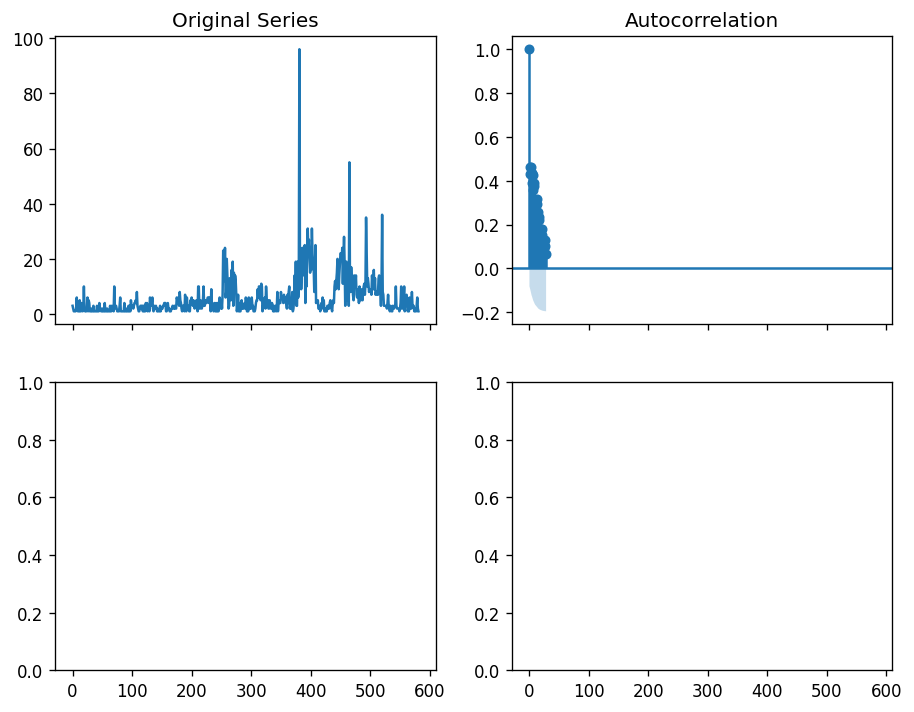

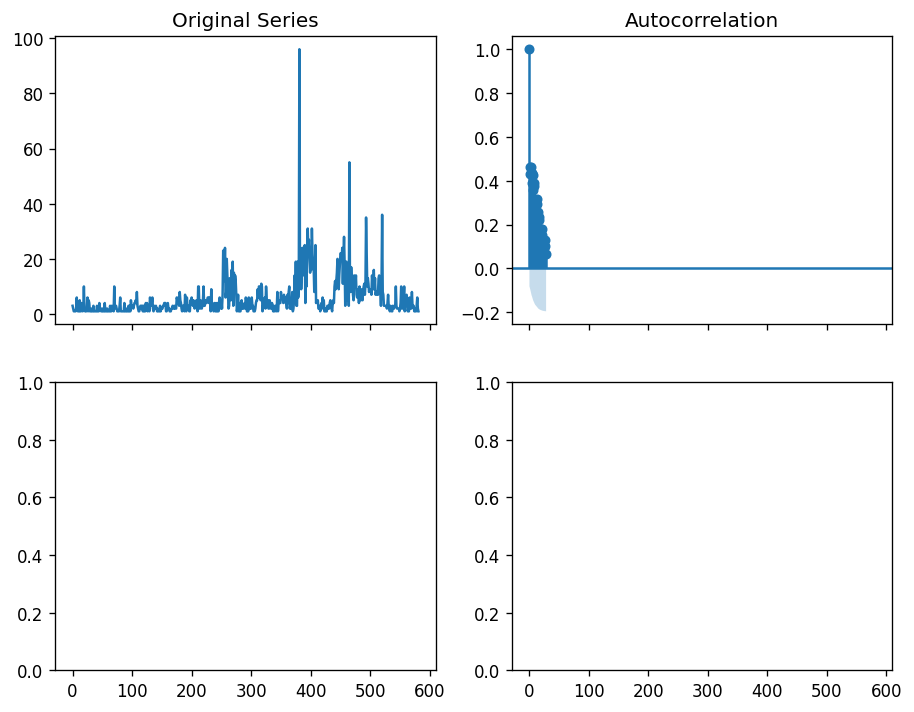

In [54]:
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(2, 2, sharex=True)
axes[0, 0].plot(ethiopia_data.LOCPRESENT); axes[0, 0].set_title('Original Series')
plot_acf(ethiopia_data.LOCPRESENT, ax=axes[0, 1])

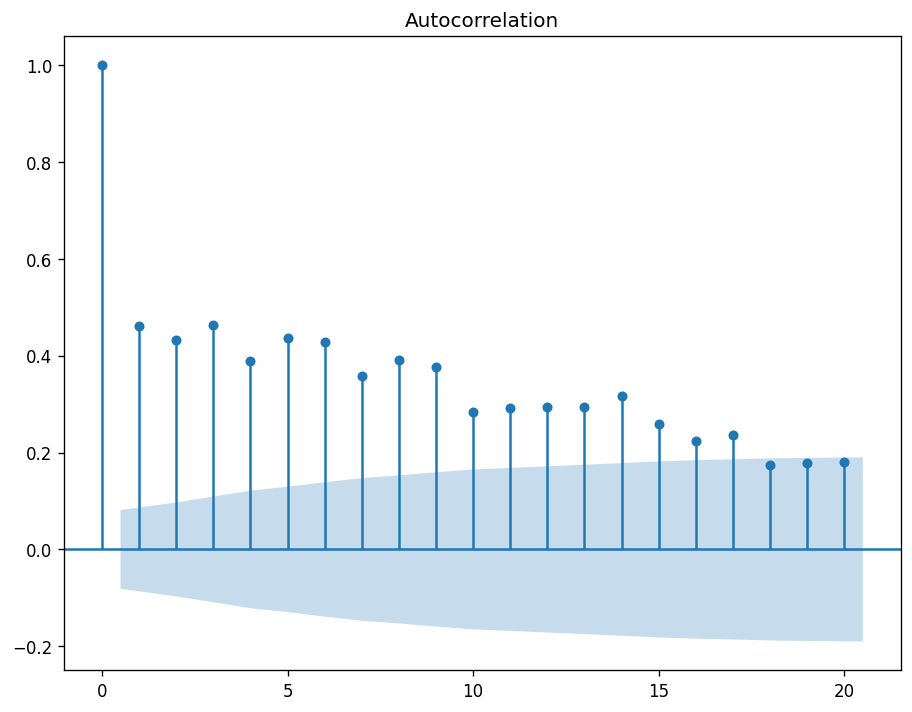

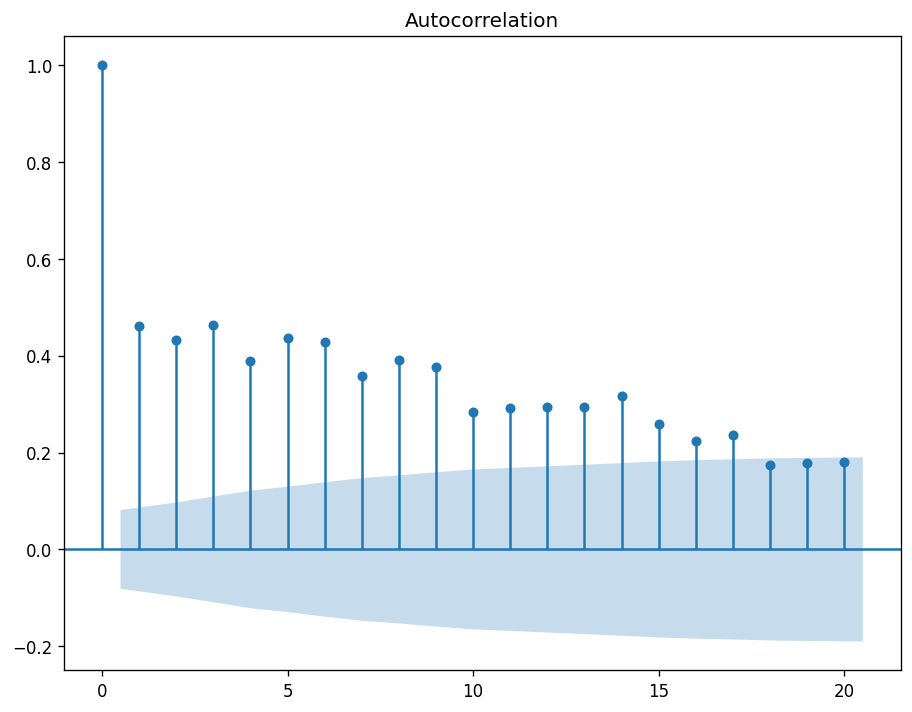

In [59]:
#Plot autocorrelation and confidence intervals using the plot_acf function
# plt.figure(figsize=(3.5, 1.5))
plot_acf(ethiopia_data['LOCPRESENT'], lags=20)
# plt.savefig('plots/ch1/B07887_01_16.png', format='png', dpi=300)

<AxesSubplot:>

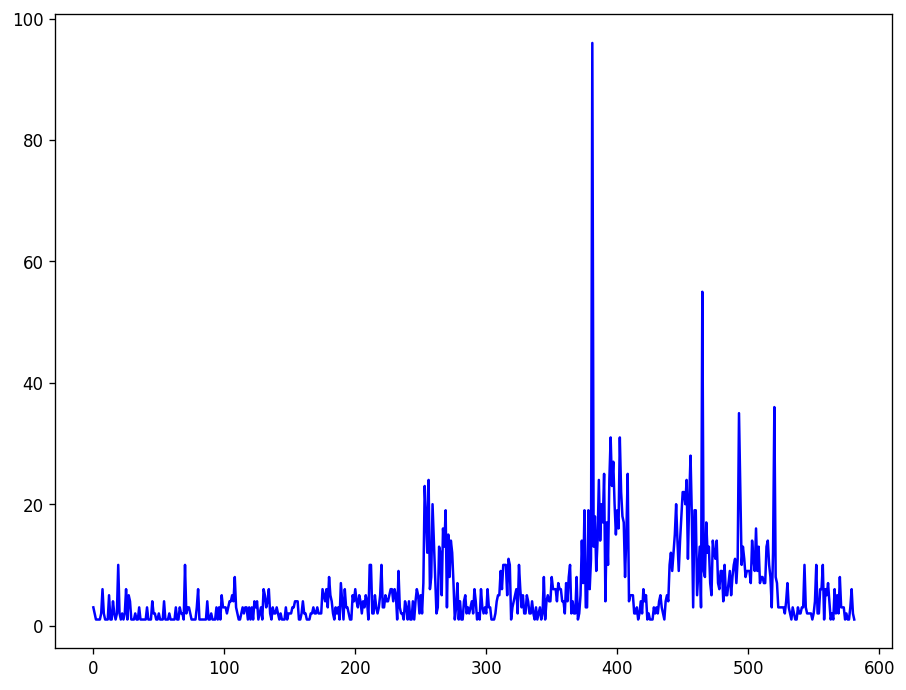

In [61]:
plt.figure(figsize=(5.5, 5.5))
ethiopia_data['LOCPRESENT'].plot(color='b')

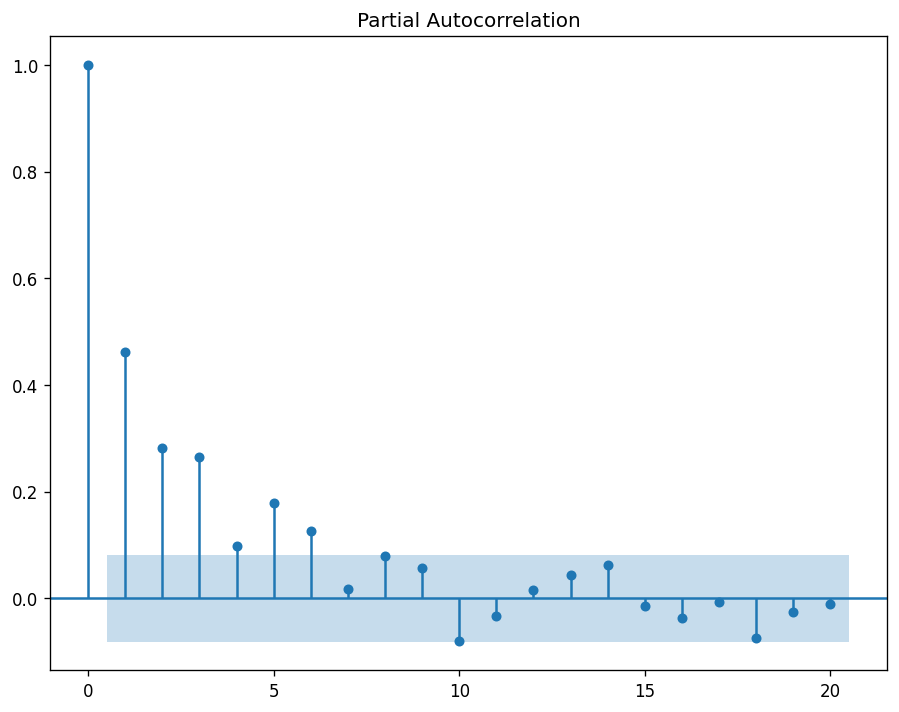

<Figure size 660x660 with 0 Axes>

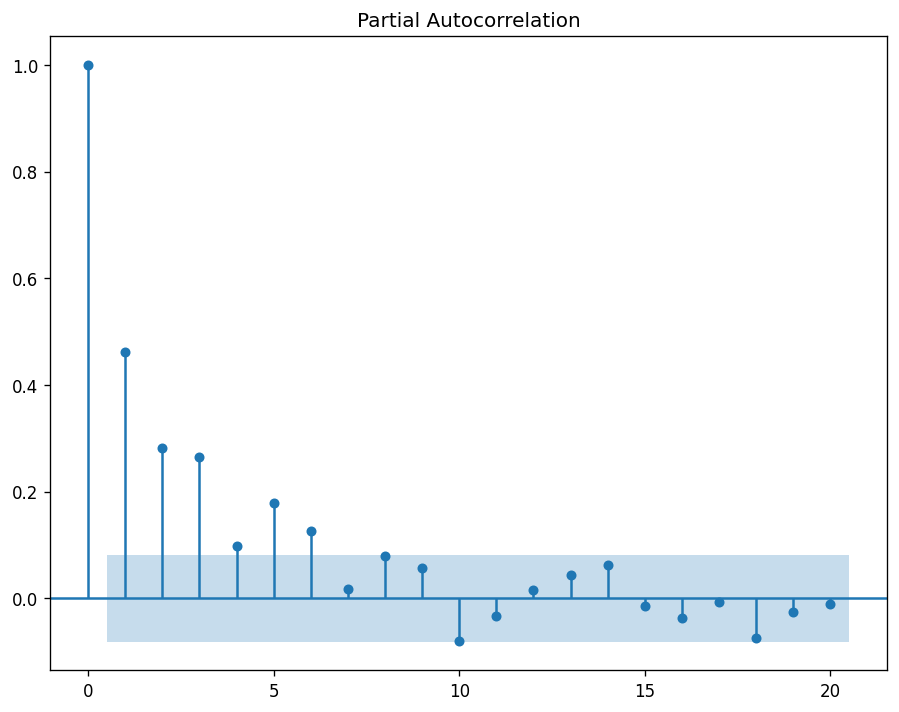

In [62]:
#Plot partial autocorrelation and confidence intervals using the plot_acf function
plt.figure(figsize=(5.5, 5.5))
plot_pacf(ethiopia_data['LOCPRESENT'], lags=20)
# plt.savefig('plots/ch1/B07887_01_17.png', format='png', dpi=300)

In [1]:
import preprocess_swarm
from preprocess_swarm import SelectGridSquares
from preprocess_swarm import ConvertoDatetime

In [2]:
locust_new = ConvertoDatetime('Swarms.csv')
locust_df = locust_new.convert()
locust_df.head()

,X,Y,OBJECTID,STARTDATE,TmSTARTDAT,FINISHDATE,TmFINISHDA,EXACTDATE,PARTMONTH,LOCNAME,...,CTLQTYU,CTLARTREA,CTLARTREAU,CTLAPPHAND,CTLAPPVEHI,CTLAPPAIR,CTLAPPMECH,CTLAPPUNK,CTLESTKILL,CAT
0,-15.131944,17.870278,1,1985-11-30,12:00:00,1985-11-30,12:00:00,No,Late,,...,,0.0,,0,0,0,0,0,0,Swarm
1,-15.400278,18.030833,2,1985-11-26,12:00:00,1985-11-26,12:00:00,No,Late,,...,,0.0,,0,0,0,0,0,0,Swarm
2,-14.668889,17.988889,3,1985-11-27,12:00:00,1985-11-27,12:00:00,No,Late,,...,,0.0,,0,0,0,0,0,0,Swarm
3,-14.633333,17.835833,4,1985-11-30,12:00:00,1985-11-30,12:00:00,No,Late,,...,,0.0,,0,0,0,0,0,0,Swarm
4,-13.353889,18.026389,5,1985-10-15,12:00:00,1985-10-15,12:00:00,Yes,,,...,,0.0,,0,0,0,0,0,0,Swarm


In [3]:
ethiopia_df = SelectGridSquares(locust_df, 'ET')
ethiopia_data = ethiopia_df.selectdf()
ethiopia_data.head()

,STARTDATE,COUNTRYID,LOCPRESENT
0,1986-07-15,ET,3
1,1987-01-03,ET,2
2,1987-04-25,ET,1
3,1987-06-05,ET,1
4,1987-06-10,ET,1


In [5]:
ethiopia_data.tail()

,STARTDATE,COUNTRYID,LOCPRESENT
577,2021-05-15 21:59:59,ET,1
578,2021-05-18 21:59:59,ET,3
579,2021-05-19 21:59:59,ET,6
580,2021-05-20 21:59:59,ET,2
581,2021-05-21 21:59:59,ET,1


In [28]:
# !pip3 install statsmodels

In [21]:
import pandas as pd 
import itertools
from matplotlib import pyplot
import statsmodels as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa import api as smt
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARIMA, ARMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller

# We will use deprecated models of statmodels which throw a lot of warnings to use more modern ones
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import plotly
import plotly.express as px
fig = px.line(ethiopia_data, x='STARTDATE', y='LOCPRESENT', title='Time Period and Count of Locust Infestation')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

In [7]:
# drop the Country Code column
col = ['COUNTRYID']
ethiopia_data.drop(col, axis = 1, inplace = True)
ethiopia_data.head()

,STARTDATE,LOCPRESENT
0,1986-07-15,3
1,1987-01-03,2
2,1987-04-25,1
3,1987-06-05,1
4,1987-06-10,1


In [11]:
# Sort the Order Date 
ethiopia_data = ethiopia_data.sort_values('STARTDATE')

#print the sorted values
ethiopia_data.head(3)

,STARTDATE,LOCPRESENT
0,1986-07-15,3
1,1987-01-03,2
2,1987-04-25,1


In [12]:
#check any missing values
ethiopia_data.isnull().sum()

STARTDATE     0
LOCPRESENT    0
dtype: int64

In [13]:
#set 'Order Date' as index
ethiopia_data = ethiopia_data.set_index('STARTDATE')
ethiopia_data.index

DatetimeIndex(['1986-07-15 00:00:00', '1987-01-03 00:00:00',
               '1987-04-25 00:00:00', '1987-06-05 00:00:00',
               '1987-06-10 00:00:00', '1987-06-19 00:00:00',
               '1987-06-24 00:00:00', '1987-06-25 00:00:00',
               '1987-06-27 00:00:00', '1987-06-28 00:00:00',
               ...
               '2021-05-04 21:59:59', '2021-05-07 21:59:59',
               '2021-05-09 21:59:59', '2021-05-10 21:59:59',
               '2021-05-14 21:59:59', '2021-05-15 21:59:59',
               '2021-05-18 21:59:59', '2021-05-19 21:59:59',
               '2021-05-20 21:59:59', '2021-05-21 21:59:59'],
              dtype='datetime64[ns]', name='STARTDATE', length=582, freq=None)

In [15]:
# average the daily sales value for each month 
# use start of each month as the timestamp
y = ethiopia_data['LOCPRESENT']
y['1986':]

STARTDATE
1986-07-15 00:00:00    3
1987-01-03 00:00:00    2
1987-04-25 00:00:00    1
1987-06-05 00:00:00    1
1987-06-10 00:00:00    1
                      ..
2021-05-15 21:59:59    1
2021-05-18 21:59:59    3
2021-05-19 21:59:59    6
2021-05-20 21:59:59    2
2021-05-21 21:59:59    1
Name: LOCPRESENT, Length: 582, dtype: int64

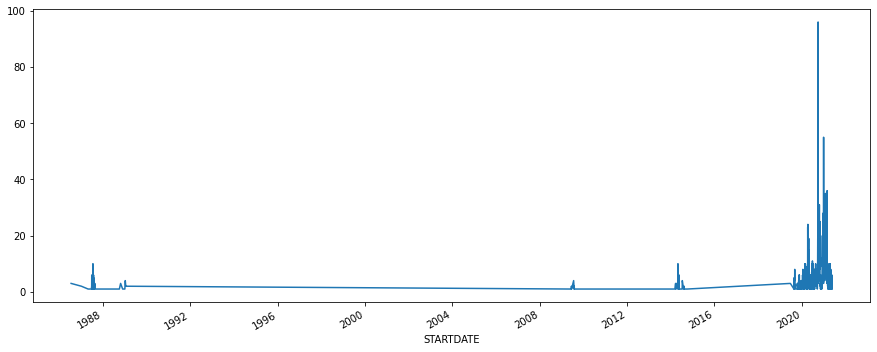

In [19]:
import matplotlib.pyplot as plt
y.plot(figsize = (15, 6))
plt.show()

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

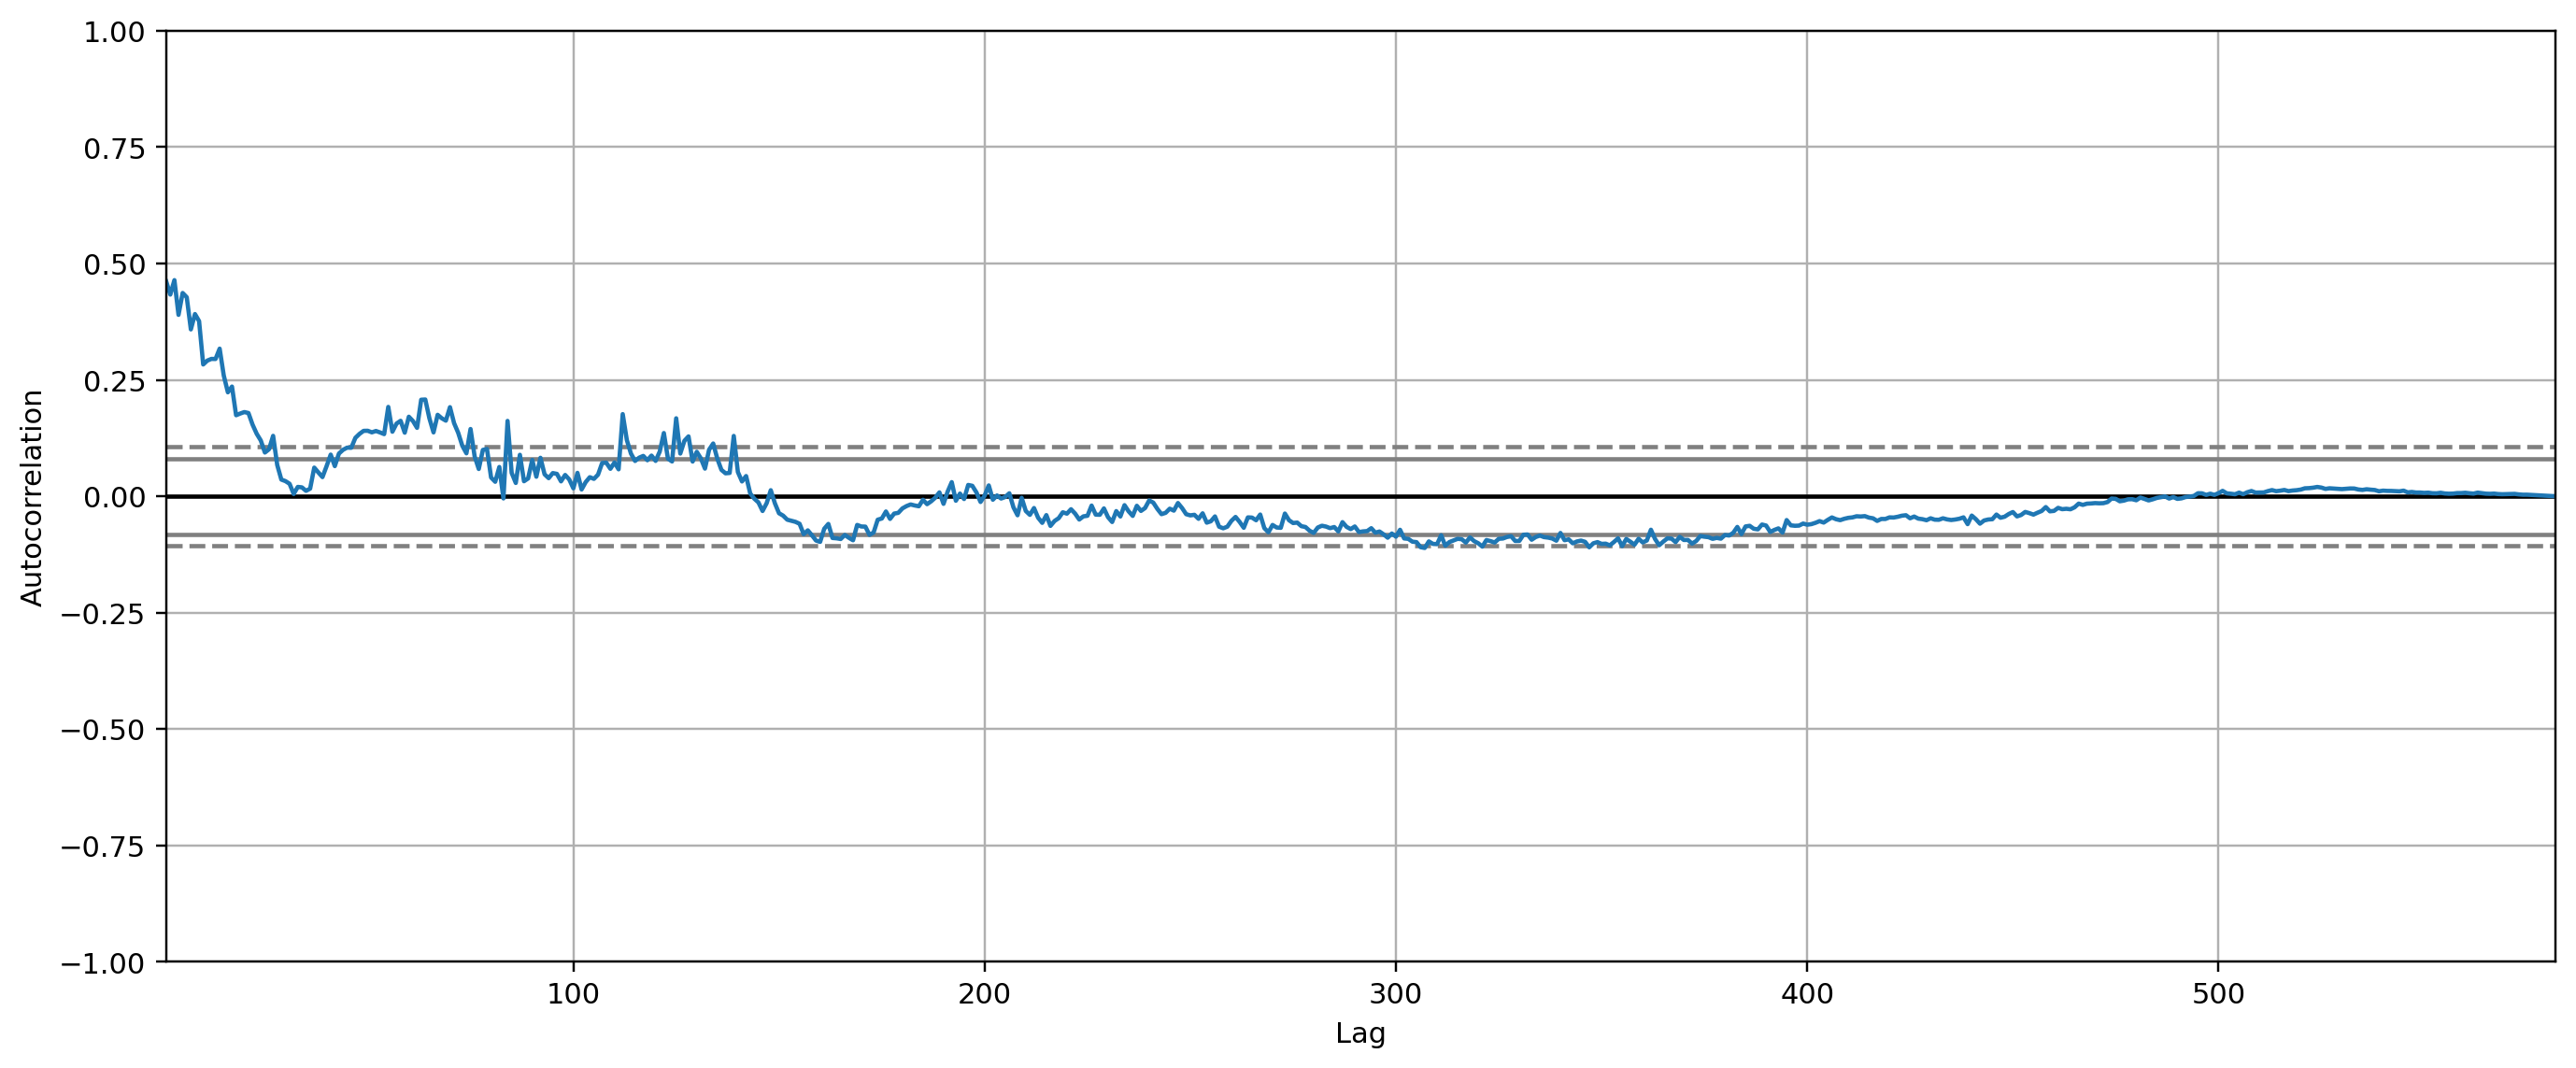

In [37]:
from pandas.plotting import autocorrelation_plot
# %matplotlib inline
plt.rcParams.update({'figure.figsize':(15,6), 'figure.dpi':220})
autocorrelation_plot(ethiopia_data.LOCPRESENT.tolist())

In [ ]:
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(y, model = 'additive')
fig = decomposition.plot()
plt.show()

### Time series forecasting with ARIMA model
### About ARIMA model

- ARIMA stands for Autoregressive Integreted Moving Average
- ARIMA models are denoted with the notation ARIMA(p, d, q)
- These three parameters account for seasonality, trend, and noise in data

In [22]:
# set the typical ranges for p, d, q
p = d = q = range(0, 2)

#take all possible combination for p, d and q
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [27]:
# Using Grid Search find the optimal set of parameters that yields the best performance
import statsmodels
for param in pdq:
    for param_seasonal in seasonal_pdq:
        # try:
        mod = statsmodels.tsa.statespace.sarimax.SARIMAX(y, order = param, seasonal_order = param_seasonal, enforce_stationary = False,enforce_invertibility=False) 
        result = mod.fit()
        print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, result.aic))
        # except:
        #     continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:4233.771022663851
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:4093.229099190198
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:4064.5213237771795
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:3858.9134900855433
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:4006.8708269668073
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:3929.3872284626045
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:3980.853045352963
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:3844.6786111943543
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:4041.6508087733932
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:3979.3701530777357
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:4041.031220067779
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:3794.5681871195675
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:3941.8850043880766
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:3861.102182925666
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:3937.100378429662
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:3789.665149954983
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:3979.775815500995
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:3981.770466728401
A

In [28]:
#Fitting the ARIMA model using above optimal combination of p, d, q (optimal means combination at which we got lowest AIC score)

model = statsmodels.tsa.statespace.sarimax.SARIMAX(y, order = (1, 1, 1), seasonal_order = (1, 1, 0, 12))
result = model.fit()
print(result.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0020      0.038      0.052      0.959      -0.073       0.077
ma.L1         -0.7751      0.026    -29.586      0.000      -0.826      -0.724
ar.S.L12      -0.4896      0.009    -55.562      0.000      -0.507      -0.472
sigma2        52.1004      0.677     76.966      0.000      50.774      53.427


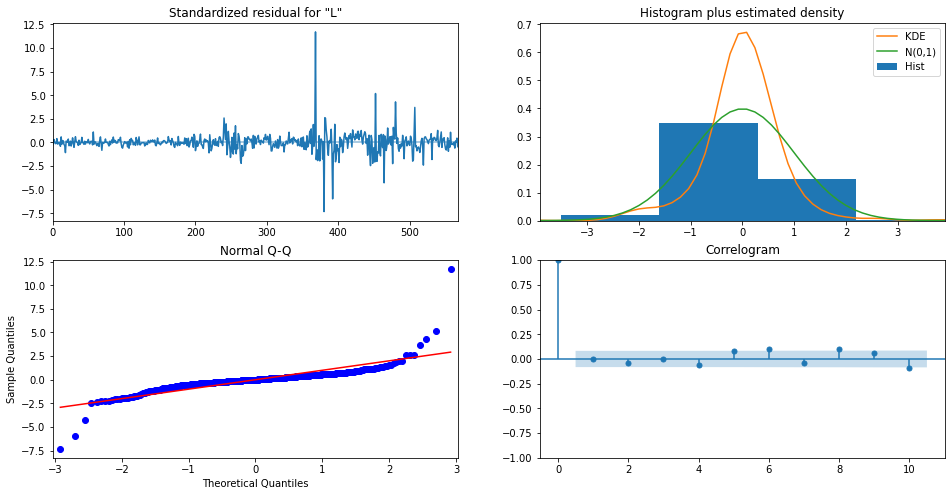

In [29]:
#run model diagnostic to investigate any unusual behavior
result.plot_diagnostics(figsize = (16, 8))
plt.show()

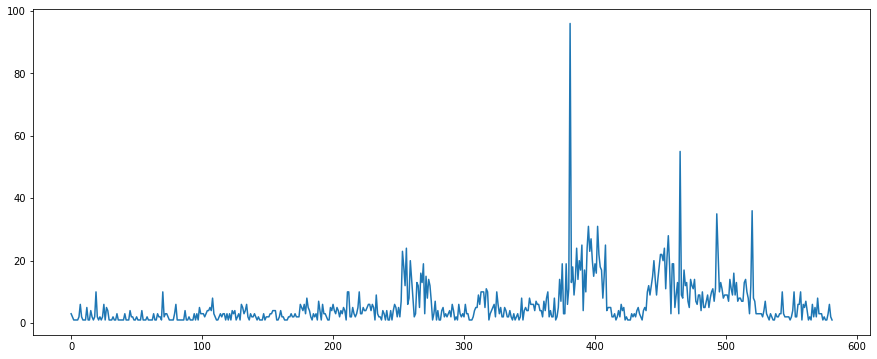

In [26]:
ethiopia_data['LOCPRESENT'].plot(figsize=(15,6))
pyplot.show()

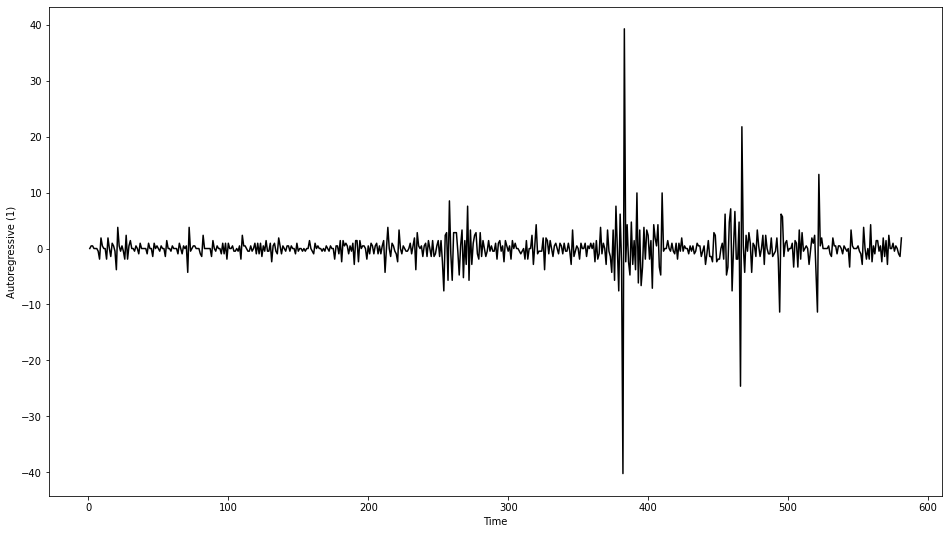

In [31]:
from statsmodels.tsa.arima_model import ARIMA
import matplotlib.pyplot as plt
model = ARIMA(ethiopia_data['LOCPRESENT'], order=(1, 1, 0))
results_AR = model.fit(disp=-1)
plt.plot(results_AR.fittedvalues, color='black')
plt.ylabel('Autoregressive (1)')
plt.xlabel('Time')
plt.rcParams["figure.figsize"] = [20,10]
plt.show()

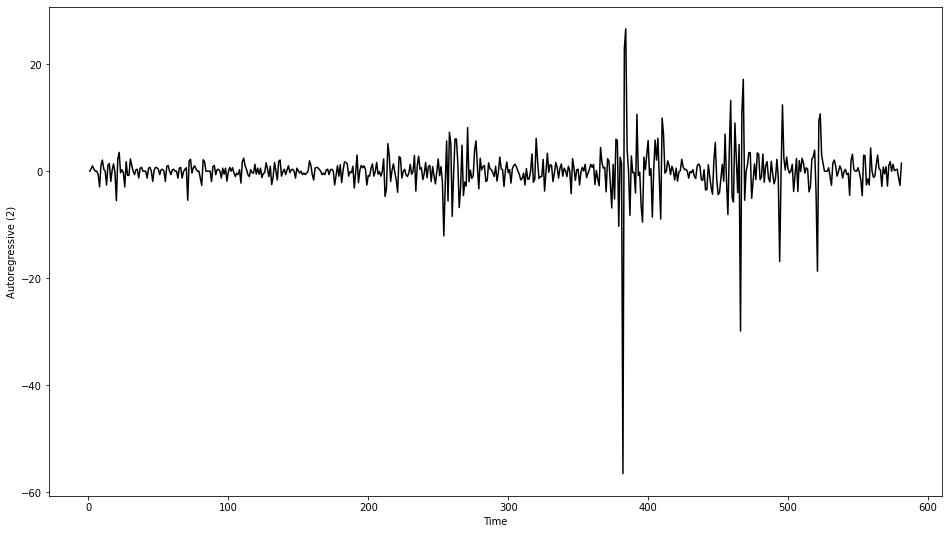

In [32]:
from statsmodels.tsa.arima_model import ARIMA
import matplotlib.pyplot as plt
model = ARIMA(ethiopia_data['LOCPRESENT'], order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(results_AR.fittedvalues, color='black')
plt.ylabel('Autoregressive (2)')
plt.xlabel('Time')
plt.rcParams["figure.figsize"] = [20,10]
plt.show()

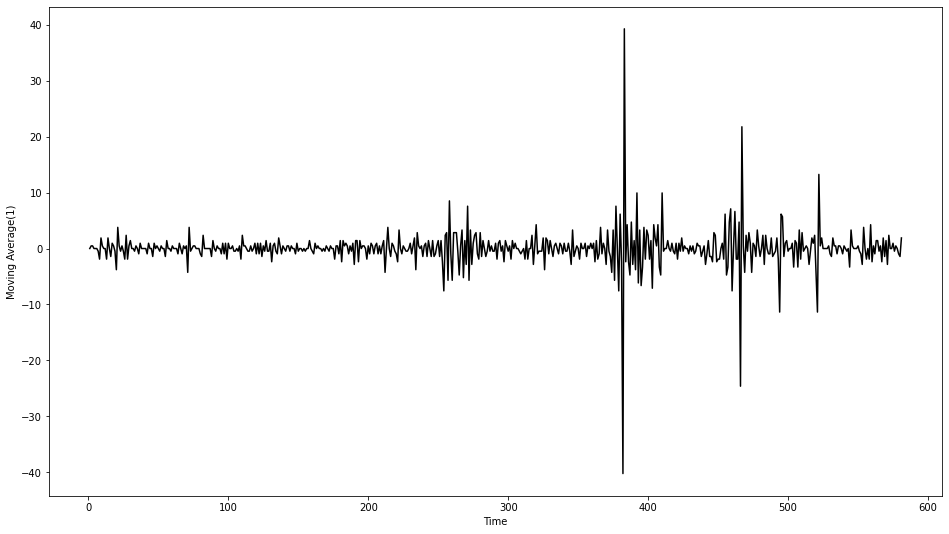

In [33]:
from statsmodels.tsa.arima_model import ARIMA
import matplotlib.pyplot as plt
model = ARIMA(ethiopia_data['LOCPRESENT'], order=(1, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(results_AR.fittedvalues, color='black')
plt.ylabel('Moving Average(1)')
plt.xlabel('Time')
plt.rcParams["figure.figsize"] = [20,10]
plt.show()

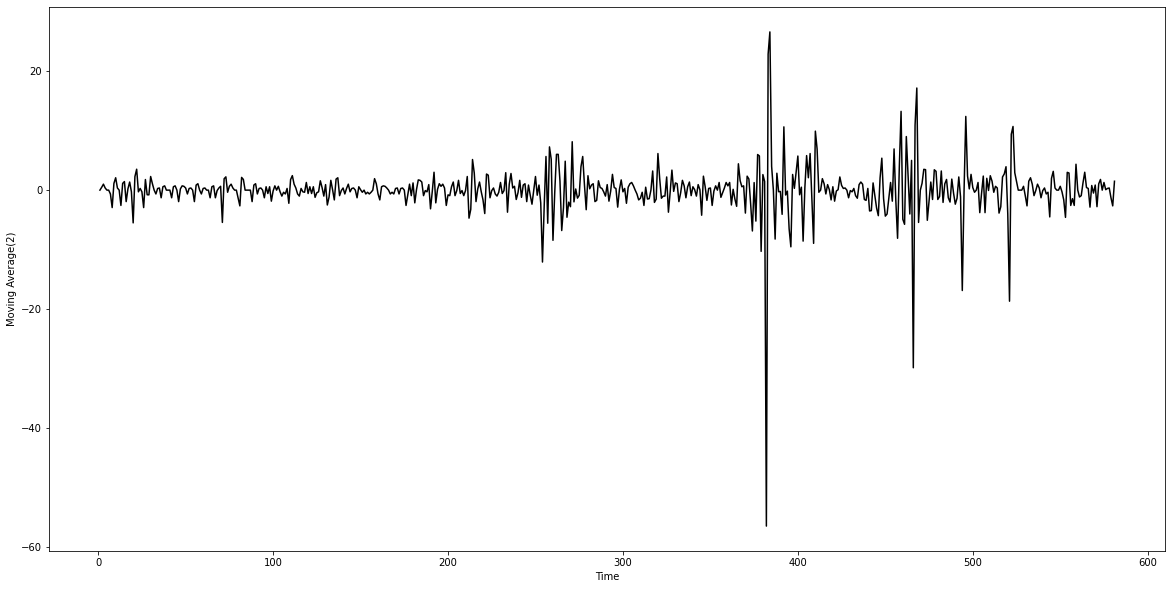

In [34]:
from statsmodels.tsa.arima_model import ARIMA
import matplotlib.pyplot as plt
model = ARIMA(ethiopia_data['LOCPRESENT'], order=(2, 1, 0))
results_AR = model.fit(disp=-1)
plt.plot(results_AR.fittedvalues, color='black')
plt.ylabel('Moving Average(2)')
plt.xlabel('Time')
plt.rcParams["figure.figsize"] = [20,10]
plt.show()